## Business Understanding<br>
For this project, I will use titanic dataset.<br>
Below is the field description, which is an important part of BU.<br>
survival - Whether a person is survived or not (0 = No; 1 = Yes)<br>
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
name - Name<br>
sex - Sex<br>
age - Age<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
ticket - Ticket Number<br>
fare - Passenger Fare<br>
cabin - Cabin<br>
embarked - Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
boat - Lifeboat (if survived)<br>
body - Body number (if did not survive and body was recovered)

In [ ]:
#loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

#setting up display preferences
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Using fetch_openml - sklearn funtion to fetch data from openML by name or datset_id

In [ ]:
X, y= fetch_openml('titanic', version=1, as_frame=True, return_X_y= True, parser='auto')
len(X)

1309

In [ ]:
#create a dataframe with input X and target y
df = pd.concat([X,y], axis=1, join='inner')

pd.set_option('display.max_columns', None)
#noticed prefix in visualized 'name' column
df.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


## Importing custom functions to improve data understanding

In [ ]:
import sys

if '/content/drive/MyDrive/datamininglabs/Functions' not in sys.path:
  sys.path.append('/content/drive/MyDrive/datamininglabs/Functions')

In [ ]:
import function as fun #importing file with saved functions

In [ ]:
df.dtypes #checking data types

,0
pclass,int64
name,object
sex,category
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object
embarked,category


In [ ]:
# data description in the business understanding phase shows that pclass has 3 unique values
df['pclass']= df['pclass'].astype('category') #labeling the categorical columns

  survived  counts  %count
0        0     809    61.8
1        1     500    38.2


/content/drive/MyDrive/datamininglabs/Functions/function.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_value = df.groupby([column]).size().reset_index(name ='counts')


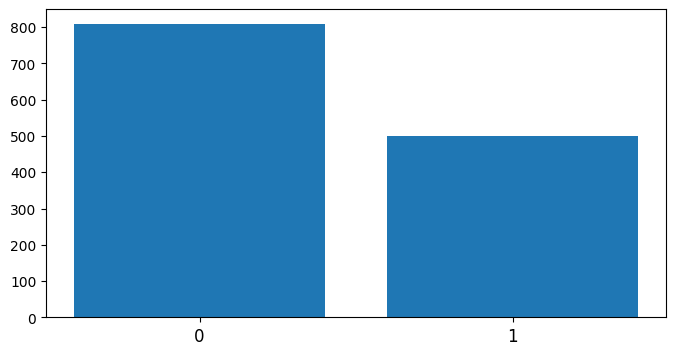

In [ ]:
#checking target file distribution
fun.data_exploration(df, 'survived')

In [ ]:
# Run metadata function to display information about both categorical and numeric fields.
# we can see that many 'object' data type variables, such as 'ticket', are most likely to be dropped as it includes many unique values.
fun.metadata(df)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,pclass,category,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,name,object,0.00,1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sex,category,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,age,float64,20.09,98,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
4,sibsp,int64,0.00,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,parch,int64,0.00,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ticket,object,0.00,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,fare,float64,0.08,281,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
8,cabin,object,77.46,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,embarked,category,0.15,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


  embarked  counts  %count
0        C     270   20.63
1        Q     123    9.40
2        S     914   69.82


<ipython-input-11-dc05995cae20>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_value = df.groupby(['embarked']).size().reset_index(name='counts')


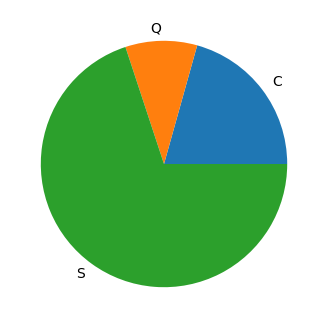

In [ ]:
# I used this code block for a pie chart of 'embarked' instead of the bar chart
count_value = df.groupby(['embarked']).size().reset_index(name='counts')
count_value['%count'] = [round(num/len(X)*100,2) for num in list(count_value['counts'])]
print(count_value)

value_list = count_value['embarked'].tolist()
count_list = count_value['counts'].tolist()
fig = plt.figure(figsize=(8, 4))

plt.pie(count_list, labels=value_list)
plt.show()

  embarked  counts  %count
0        C     270   20.63
1        Q     123    9.40
2        S     914   69.82


/content/drive/MyDrive/datamininglabs/Functions/function.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_value = df.groupby([column]).size().reset_index(name='counts')


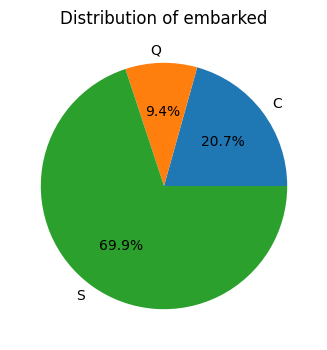

In [ ]:
# That function is defined as pie_cate in the functions file
fun.pie_cate(df, 'embarked')

      sex  counts  %count
0  female     466    35.6
1    male     843    64.4


/content/drive/MyDrive/datamininglabs/Functions/function.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_value = df.groupby([column]).size().reset_index(name ='counts')


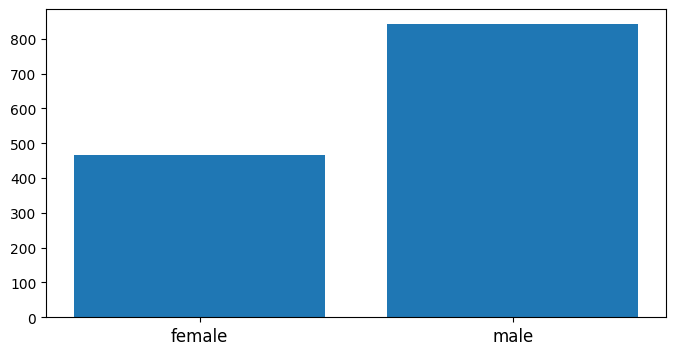

In [ ]:
#exploring some of the categorical variables
fun.data_exploration (df, 'sex')

there are38  of outliers for fare.
[211.3375, 227.525, 227.525, 247.5208, 247.5208, 227.525, 221.7792, 262.375, 512.3292, 512.3292, 262.375, 247.5208, 227.525, 221.7792, 263.0, 263.0, 263.0, 263.0, 263.0, 263.0, 211.5, 211.5, 211.3375, 512.3292, 211.3375, 227.525, 211.3375, 262.375, 262.375, 262.375, 262.375, 262.375, 221.7792, 221.7792, 512.3292, 211.5, 211.5, 211.5]
------------------Box plot---------------------


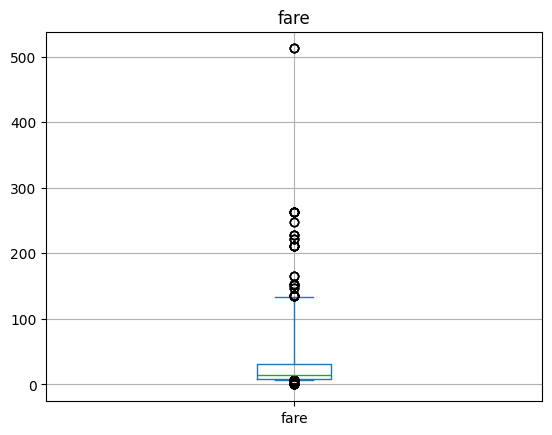

-----------------Distribution plot-----------------


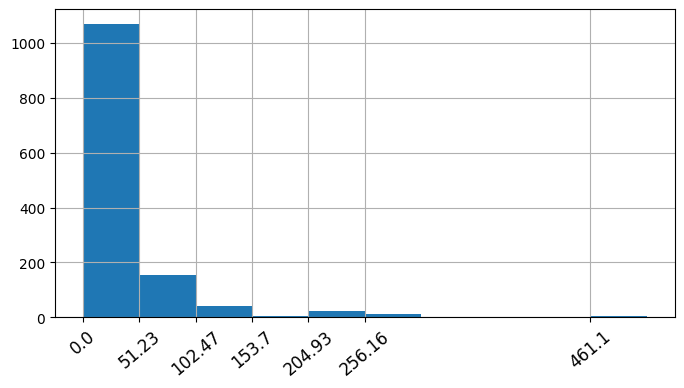

In [ ]:
#function to explore numeric variables for data distribution
fun.data_exploration (df, 'fare')

## Understanding missing values

In [ ]:
# get percentage of missing values in our dataset
# we can see that 'cabin', 'boat', 'body', and 'home.dest' may be excluded
df.isnull().sum()/len(df)*100

,0
pclass,0.000000
name,0.000000
sex,0.000000
age,20.091673
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.076394
cabin,77.463713
embarked,0.152788


## data vizualization for missing value destribution using 'missngno' library

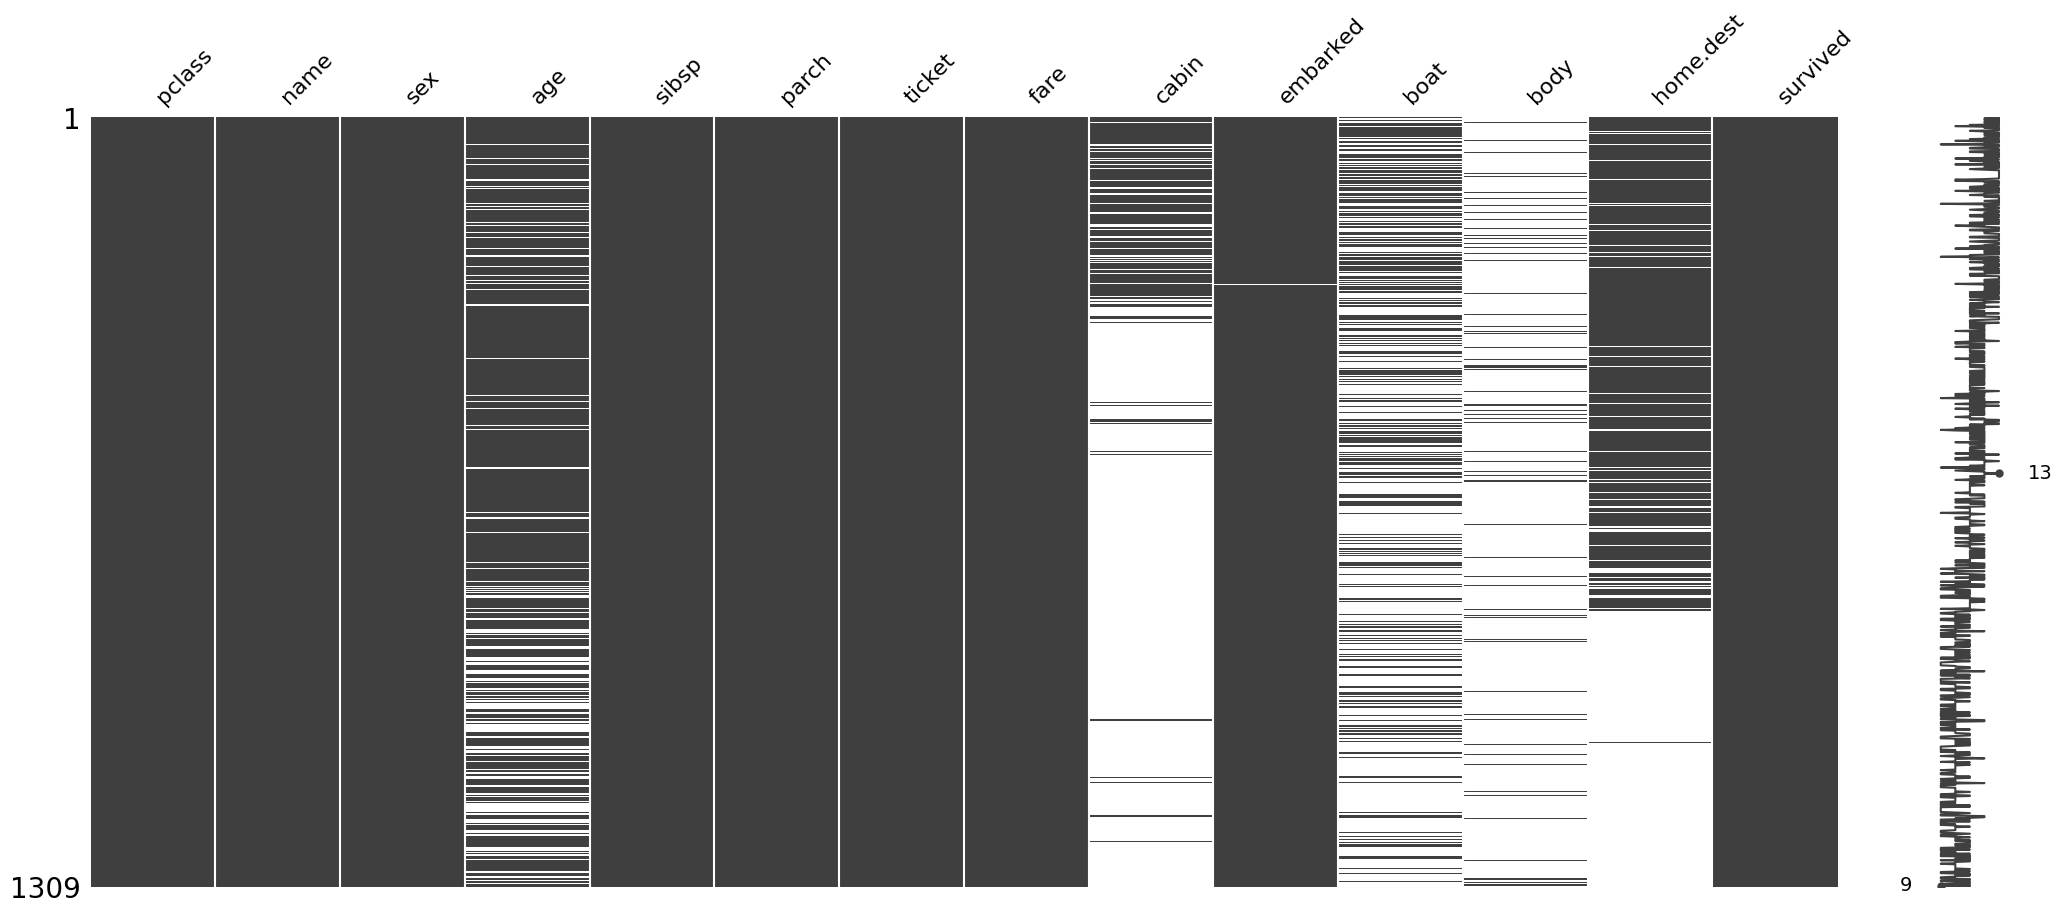

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()

In [ ]:
#dropping feature with high missing percentage
df.drop(['cabin'], axis= 1, inplace=True)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [ ]:
# Dropping rows that have missing values in either fair or embarked using the 'dropna'
df.dropna(how = 'any', subset= ['fare', 'embarked'], inplace=True)
df.isnull().sum()/len(X)*100

,0
pclass,0.000000
name,0.000000
sex,0.000000
age,20.091673
sibsp,0.000000
parch,0.000000
ticket,0.000000
fare,0.000000
embarked,0.000000
boat,62.796028


## Feature correlation heatmap visualzation

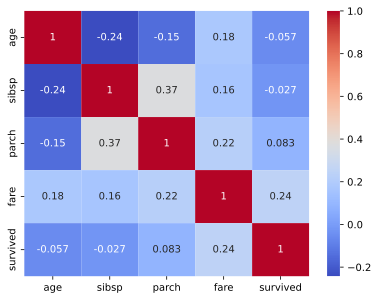

In [ ]:

import seaborn as sns
%config InlineBackend.figure_format = 'svg'

df_correlation = df
df_correlation ['survived']=df_correlation['survived'].astype('float')
g = sns.heatmap(df_correlation[['age', 'sibsp', 'parch', 'fare', 'survived']].corr(),
                annot=True, cmap = 'coolwarm')

## Outliers<br>
An outlier is a data point that is outside a normal distribution of the data.<br>
In this project, we consider two methods to determine outliers:<br>
use IQR<br>
use Z-scores<br>
A commonly used rule says that a data point is an outlier if it is more than 1.5 IQR above the third quartile (Q3) or below the first quartile (Q1).<br>
High = (Q3) + 1.5 IQR<br>
Low = (Q1) – 1.5 IQR<br>
IQR (interquartile range) is calculated as the difference between the third quartile and the first quartile. It tells us how spread out the middle half of our data is.<br>
If we only want to remove strong outliers, change the number 1.5 to 3:<br>
High = (Q3) + 3 IQR<br>
Low = (Q1) – 3 IQR

In [ ]:
low=df['fare'].quantile(0.05)
low

7.225

     -----------------------Box plot---------------------------


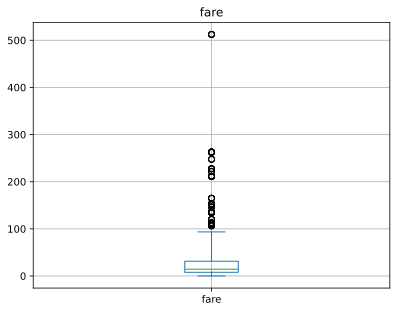

In [ ]:
# box plot is a great way to examine outliers
# the position of whiskers is default at 1.5 multiple IQR for low and high.
print('     -----------------------Box plot---------------------------')
df['fare'].plot.box(title='fare', whis=3)
plt.grid()
plt.show()

     -----------------------Box plot---------------------------


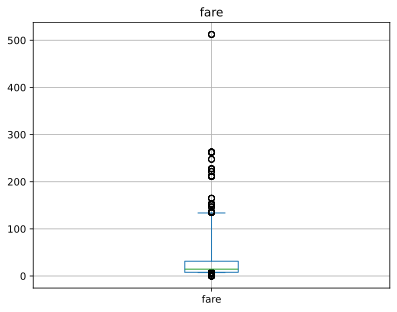

In [ ]:
print('     -----------------------Box plot---------------------------')
df['fare'].plot.box(title='fare', whis=(5,95))
plt.grid()
plt.show()

In [ ]:
# find q1 and q3, and then calculate iqr, high and low values
q1 = df['fare'].describe()['25%']
q3 = df['fare'].describe()['75%']
iqr = q3 -q1
high = q3 + 3 * iqr
low = q1- 3 * iqr
print(high, low)

101.4126 -62.24179999999999


In [ ]:
# find all outliers that are below the low or above the high
outlier = df[(df['fare']<low) | (df['fare']>high)]['fare'].tolist()
# print No_ of outliers
if len(outlier) > 0:
  print('There are' + ' ' + str(len(outlier)) + ' ' + 'outliers for'+ 'fare' + '.')
  print(outlier)
else:
  print('There is no outlier of' + 'fare' + '.')

There are 84 outliers forfare.
[211.3375, 151.55, 151.55, 151.55, 151.55, 227.525, 227.525, 247.5208, 247.5208, 227.525, 221.7792, 135.6333, 164.8667, 262.375, 134.5, 512.3292, 512.3292, 120.0, 120.0, 120.0, 120.0, 262.375, 136.7792, 136.7792, 151.55, 151.55, 106.425, 247.5208, 106.425, 227.525, 221.7792, 110.8833, 263.0, 263.0, 263.0, 263.0, 263.0, 263.0, 133.65, 133.65, 211.5, 153.4625, 153.4625, 211.5, 211.3375, 106.425, 512.3292, 146.5208, 211.3375, 113.275, 113.275, 113.275, 108.9, 108.9, 108.9, 135.6333, 227.525, 211.3375, 262.375, 262.375, 262.375, 262.375, 262.375, 153.4625, 134.5, 134.5, 134.5, 146.5208, 146.5208, 221.7792, 221.7792, 110.8833, 110.8833, 110.8833, 512.3292, 135.6333, 164.8667, 164.8667, 164.8667, 211.5, 211.5, 211.5, 134.5, 135.6333]


## Using Z-scores
Z-scores can quantify the unusualness of an observation if the data follow the normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls.<br> For example,
a Z-score of 2 indicates that the observation is two standard deviations above the average while a Z-score of -2 means below.<br> A Z-score of zero represents a value that equals the mean.
Z-score can be calculated by subtracting the mean from the value of an observation, and then dividing by the standard deviation.<br>
A standard cut-off value for finding outliers is Z-scores of +/-3.

In [ ]:
# get mean and std of the data
mean = df['fare'].describe()['mean']
std = df['fare'].describe()['std']
# get outliers with Z-scores that are greater than 3 or less than -3
outlier = df[((df['fare'] - mean)/std > 3) | ((df['fare']-mean)/std<-3)]['fare'].tolist()


In [ ]:
# print outliers. We can see that we returned less outliers compared to using IQR
if len(outlier) > 0:
  print('There are' + str(len(outlier)) + 'of outliers for'+ 'fare' + '.')
  print(outlier)
else:
  print('There is no outlier of' + 'fare' + '.')

There are38of outliers forfare.
[211.3375, 227.525, 227.525, 247.5208, 247.5208, 227.525, 221.7792, 262.375, 512.3292, 512.3292, 262.375, 247.5208, 227.525, 221.7792, 263.0, 263.0, 263.0, 263.0, 263.0, 263.0, 211.5, 211.5, 211.3375, 512.3292, 211.3375, 227.525, 211.3375, 262.375, 262.375, 262.375, 262.375, 262.375, 221.7792, 221.7792, 512.3292, 211.5, 211.5, 211.5]


## Data Preparation
This step prepares data ready for ML. It includes:<br>
Select columns and rows that are relevant<br>
Clean data such as replace missing values<br>
Feature engineering such as creating new variables, discretization selected continuous variables<br>
Feature engineering is the most creative part of ML<br>

The data understanding and preparation steps are iterative.

In [ ]:
# removing columns with too many missing values
# note - boat and body are also closely correlated with the target; they almost talking about the same thing.
df.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)


In [ ]:
df.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0.0


In [ ]:
# metadata shows that tikeket variable has more than 900 unique values, and it is not an interval variable.
# hence, this column cannot be used for prediction or classifcation.
df.drop(['ticket'], axis=1, inplace= True)

## Feature engineering
This is the most creative part of ML.<br>
### Family<br>
Earlier, we noticed that 'sibsp' and 'parch' are weakly corrleated to the target. See definitions below.<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
The two may be combined to create a new feature called: family_size.<br>
Also, if a family size is 0, meaning no parents, spouses, or children, it is considered as alone.

In [ ]:
# create a "family_size" column
df['family_size'] = df['parch'] + df['sibsp']

# dropping the original column
df.drop(['parch', 'sibsp'], axis=1, inplace=True)
df.head(5)

,pclass,name,sex,age,fare,embarked,survived,family_size
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,1.0,0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,1.0,3
2,1,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,0.0,3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,0.0,3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,0.0,3


In [ ]:
# if a family size is 0, meaning this person is alone
# we then create a binary variable as "is_alone"
df['alone'] = df['family_size'].apply(lambda x: 0 if x>0 else 1)
df['alone']= df['alone'].astype('category')
df.head(5)

,pclass,name,sex,age,fare,embarked,survived,family_size,alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,S,1.0,0,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,S,1.0,3,0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,S,0.0,3,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,S,0.0,3,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,S,0.0,3,0


In [ ]:
df.dtypes

pclass         category
name             object
sex            category
age             float64
fare            float64
embarked       category
survived        float64
family_size       int64
alone          category
dtype: object

there are35  of outliers for family_size.
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
------------------Box plot---------------------


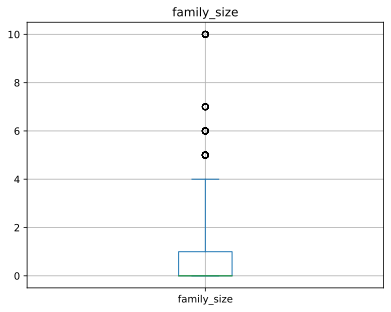

In [ ]:
# going back to data understanding is needed for each new feature
# we can see the family size is usually between 0 and 4; and maximum is 10.
fun.data_exploration (df, 'family_size')

  family_size  counts  %count
0           0     787   60.26
1           1     235   17.99
2           2     159   12.17
3           3      43    3.29
4           4      22    1.68
5           5      25    1.91
6           6      16    1.23
7           7       8    0.61
8          10      11    0.84


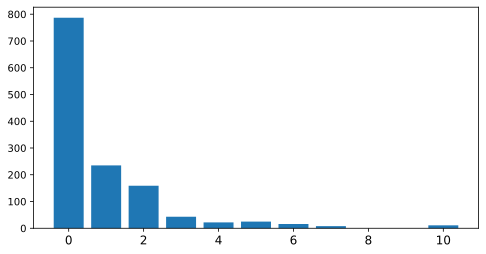

In [ ]:
# because the fmily size has less than 10 unique values, we may want to change it to categorical and see its distribution
df['family_size']= df['family_size'].astype('category')
fun.data_exploration (df, 'family_size')

  family_size_bined  counts  %count
0                 0     787   60.26
1                 1     235   17.99
2                 2     159   12.17
3                 3     125    9.57


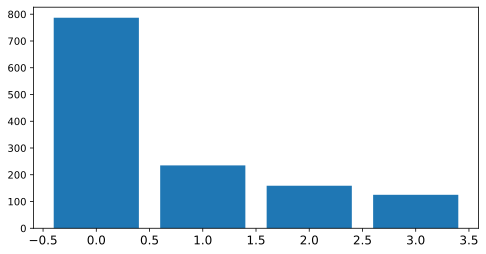

In [ ]:
# now creating a binned 'family size' that has four categories
df['family_size_bined'] = pd.cut(x=df['family_size'], bins= [-1,0,1,2,11], labels = [0,1,2,3])
fun.data_exploration (df, 'family_size_bined')

In [ ]:
# changing 'family_size' data type back
df['family_size']= df['family_size'].astype('int64')
df.dtypes

pclass               category
name                   object
sex                  category
age                   float64
fare                  float64
embarked             category
survived              float64
family_size             int64
alone                category
family_size_bined    category
dtype: object

  alone  counts  %count
0     0     519   39.74
1     1     787   60.26


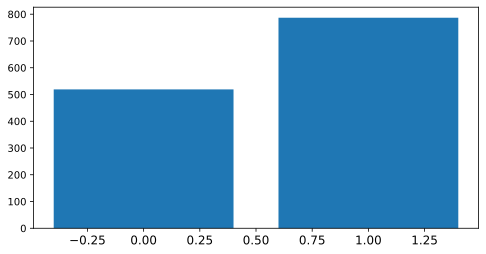

In [ ]:
fun.data_exploration (df, 'alone')

## Prefix <br>
Now let's look at the name column, where there are unique categories of prefix .<br> Rather than unique names, let's create a categorical variable called prefix. <br>
.split() is used here.

In [ ]:
# first split name by comma, and then split the second part by period
df['prefix'] = df['name'].str.split(', ' ,expand= True) [1].str.split(".", expand=True)[0]
#removing the 'name'feature
df.drop(['name'], axis=1, inplace=True)
df.head(5)

,pclass,sex,age,fare,embarked,survived,family_size,alone,family_size_bined,prefix
0,1,female,29.0000,211.3375,S,1.0,0,1,0,Miss
1,1,male,0.9167,151.5500,S,1.0,3,0,3,Master
2,1,female,2.0000,151.5500,S,0.0,3,0,3,Miss
3,1,male,30.0000,151.5500,S,0.0,3,0,3,Mr
4,1,female,25.0000,151.5500,S,0.0,3,0,3,Mrs


In [ ]:
#let's see distributions
# we will keep only categories with high value count,and make all the rest as 'other'
df['prefix'].value_counts()

Mr              756
Miss            259
Mrs             196
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: prefix, dtype: int64

In [ ]:
# based on above, we will create an 'other' prefix for these count below 10
other_prefix = (df['prefix'].value_counts() < 10) # it returns a true or false for a prefix is other or not
df['prefix'] = df.prefix.apply(lambda x: 'other' if other_prefix[x] else x)
df['prefix']= df['prefix'].astype('category')
df['prefix'].value_counts()

Mr        756
Miss      259
Mrs       196
Master     61
other      34
Name: prefix, dtype: int64

## Replace or drop missing values <br>
For variables with a reasonable amount of missing data, we may perform missing value imputation or replacement. The 'age' variable has a 20% percentage missing.<br>
Let's try to explore its missing value with regards to other categorical variables.<br>
We use groupby function here.

In [ ]:
# get mean of age and count number of data points within each pclass and prefix combination.
df.groupby(['prefix', 'pclass'])['age'].agg(['mean', 'count'])

mean  count
prefix pclass                  
Master 1        6.983340      5
       2        2.757573     11
       3        6.090089     37
Miss   1       30.206897     58
       2       20.717015     48
       3       17.360842    103
Mr     1       41.450758    132
       2       32.346715    137
       3       28.215434    311
Mrs    1       42.924242     66
       2       33.518519     54
       3       32.326531     49
other  1       44.285714     21
       2       39.545455     11
       3             NaN      0

In [ ]:
#replaced the missing age by mean of its title and passenger class
df['age'].fillna(df.groupby(['pclass', 'prefix']) ['age'].transform('mean'), inplace=True)

In [ ]:
# check missing values again. We can drop 1 missing value.
df.isnull().sum()

pclass               0
sex                  0
age                  1
fare                 0
embarked             0
survived             0
family_size          0
alone                0
family_size_bined    0
prefix               0
dtype: int64

In [ ]:
#removing the observations with missing values
df.dropna(how='any', inplace=True)

df.isnull().sum()

pclass               0
sex                  0
age                  0
fare                 0
embarked             0
survived             0
family_size          0
alone                0
family_size_bined    0
prefix               0
dtype: int64

In [ ]:
# now our data set has 1305 observations.
len(df)

1305

## data transformation
We may also want to change some categorical fields to numeric if needed.<br>
For example, we need to create dummies for binary 'sex' variable as (0,1) instead of (female, male)

In [ ]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()

# creating dummies for gender feature
df['sex'] = le.fit_transform(df['sex'])
le_sex_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_sex_name_mapping

{'female': 0, 'male': 1}

In [ ]:
# find metadata again
# the data looks good, where we see less unique values in categorical variables
fun.metadata(df)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,pclass,category,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sex,int64,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,age,float64,0.0,108,29.450372,13.366368,0.1667,21.0000,28.215434,36.000,80.0000
3,fare,float64,0.0,280,33.243477,51.781022,0.0000,7.8958,14.454200,31.275,512.3292
4,embarked,category,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,survived,float64,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,family_size,int64,0.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,alone,category,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,family_size_bined,category,0.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,prefix,category,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Encoding categorical data

In [ ]:
cat_cols = ['pclass', 'prefix', 'embarked', 'family_size_bined']
df_final = pd.get_dummies(df, prefix = ['pclass', 'prefix', 'embarked', 'family_size_bined'], columns= cat_cols)
df_final.head(5)

,sex,age,fare,survived,family_size,alone,pclass_1,pclass_2,pclass_3,prefix_Master,prefix_Miss,prefix_Mr,prefix_Mrs,prefix_other,embarked_C,embarked_Q,embarked_S,family_size_bined_0,family_size_bined_1,family_size_bined_2,family_size_bined_3
0,0,29.0000,211.3375,1.0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,1,0.9167,151.5500,1.0,3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0,2.0000,151.5500,0.0,3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,1,30.0000,151.5500,0.0,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,0,25.0000,151.5500,0.0,3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
fun.metadata(df_final) # Checking metadata again

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,sex,int64,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,age,float64,0.0,108,29.450372,13.366368,0.1667,21.0000,28.215434,36.000,80.0000
2,fare,float64,0.0,280,33.243477,51.781022,0.0000,7.8958,14.454200,31.275,512.3292
3,survived,float64,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,family_size,int64,0.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,alone,category,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,pclass_1,uint8,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,pclass_2,uint8,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,pclass_3,uint8,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,prefix_Master,uint8,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Modeling

In [ ]:
# import needed packages
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use straified sampling method for class target.
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('survived', axis=1),
                                                    df_final['survived'], stratify = df_final['survived'],
                                                    test_size=0.2, random_state=101)
print('The length of training set:', len(X_train))
print('The length of testing set:', len(X_test))

The length of training set: 1044
The length of testing set: 261


## Decision Tree with no decision criterion
We again tune:
- criterion
- min_samples_leaf (pre-pruning)
- max_depth (pre-pruning)
## Pre-pruning only

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth=4, min_samples_leaf= 30)

clf_dt.fit (X_train, y_train)
print(clf_dt.score(X_test, y_test)) # Baseline accuracy

0.7777777777777778


In [ ]:
# create the confusion matrix table
# note our target event is Survived, which is 1.
y_predict = clf_dt.predict(X_test)
from sklearn.metrics import confusion_matrix
matrix_table = pd.DataFrame(
              confusion_matrix(y_test, y_predict),
              columns= ['Predicted Not Survived', 'Predicted Survived'],
              index= ['True Not Survived', 'True Survived']
)
matrix_table

,Predicted Not Survived,Predicted Survived
True Not Survived,147,14
True Survived,44,56


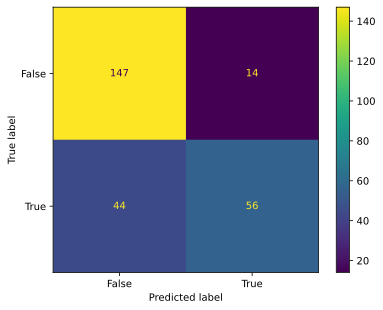

In [ ]:
# Visualize the confusion matrix result
cm = metrics.confusion_matrix(y_test,y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels =[False, True])
cm_display.plot()
plt.show()

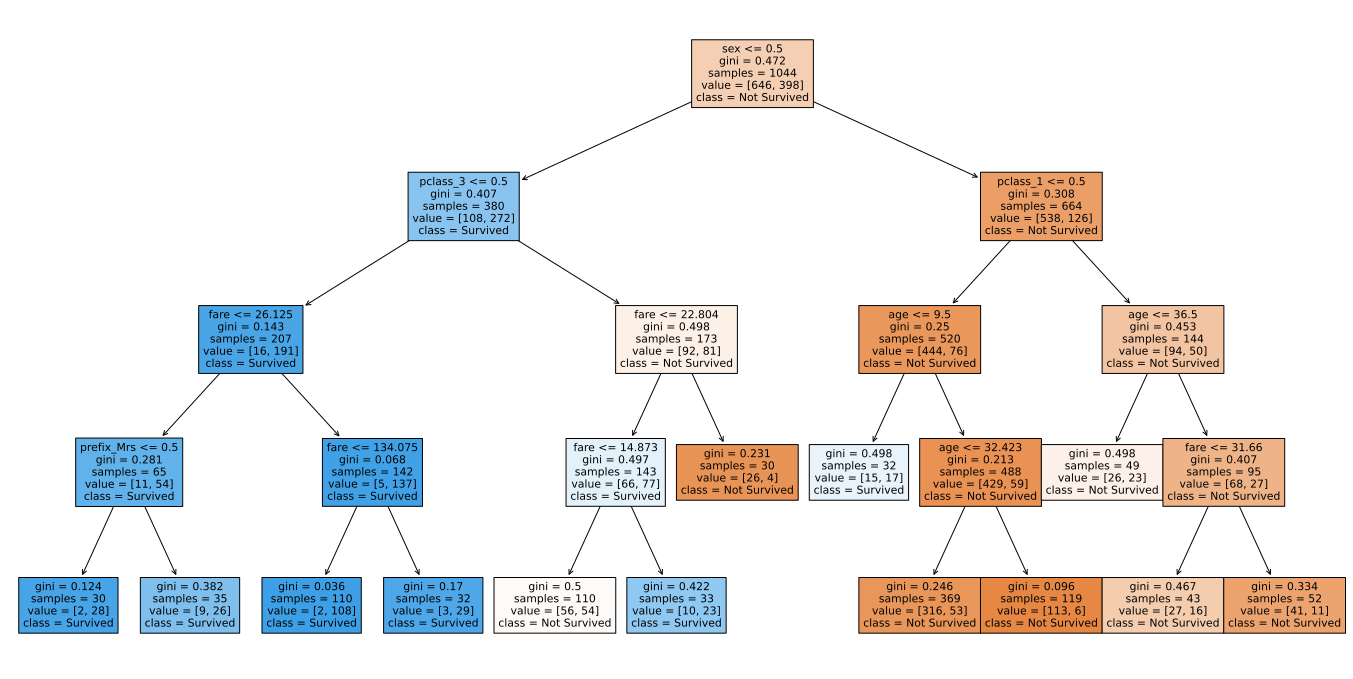

In [ ]:
# Visualize the decision tree after pre-pruning
# A tree with 10 leaves
X = df_final.drop('survived', axis=1)
fn=X.columns
cn = ['Not Survived', 'Survived']

fig = plt.figure(figsize=(24,12))
_ = tree.plot_tree(clf_dt, feature_names = fn, class_names = cn, filled= True)

## Post-pruning <br>
We have used leaf size and depth of true for pre-pruning. <br> Now let's explore post pruning. <br>Sklearn DecisionTreeClassifier implements cost complexity pruning technique.<br>
using a cost complexity parameter, ccp_alpha .<br> Greater values of ccp_alpha increase the number of nodes pruned.<br>
choose a ccp_alpha based on validation score.

In [ ]:
print('Training accuracy: ', clf_dt.score(X_train, y_train))
print('Test accuracy: ', clf_dt.score(X_test, y_test))

Training accuracy:  0.8007662835249042
Test accuracy:  0.7777777777777778


In [ ]:
path=clf_dt.cost_complexity_pruning_path(X_train, y_train)

#path variable gives two things: ccp_alphas and impurities
ccp_alphas, impurities= path.ccp_alphas,path.impurities

print('ccp alpha will give list of values:', ccp_alphas)
print('*****************************************************')
print('Impurities in Decision Tree:', impurities)

ccp alpha will give list of values: [0.         0.00027118 0.00112276 0.00116231 0.00149768 0.00153425
 0.00206486 0.00212355 0.00779697 0.00921065 0.03729278 0.12811572]
*****************************************************
Impurities in Decision Tree: [0.27038213 0.27065331 0.27177607 0.27293839 0.27443607 0.27597032
 0.27803518 0.28015873 0.28795569 0.30637699 0.34366978 0.4717855 ]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

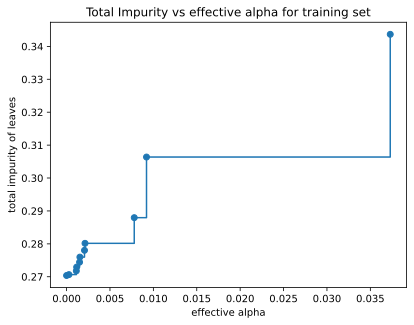

In [ ]:
# Plot for Effective alphas
fig, ax = plt.subplots()
# Maximum effective alpha is removed as it is a tree with only one node
ax.plot(ccp_alphas[: -1],impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
# training DTs using the effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print(
    'Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1281157203978222


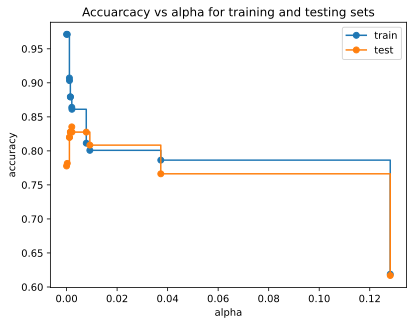

In [ ]:
# let's visualize the accuracy score for train and test
train_scores= [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuarcacy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker="o", label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker="o", label='test', drawstyle='steps-post')
ax.legend()
plt.show()

# Based on the graph below, the 6th alpha represents the optimal solution
# it has the highest testing accuracy

In [ ]:
# putting the scores in a table
# we can see that the ccp_alpha value is the index 6 value
ccp_alpha_table = pd.DataFrame()
ccp_alpha_table['train_score'] = train_scores
ccp_alpha_table['test_score'] = test_scores
ccp_alpha_table['ccp_alpha'] = ccp_alphas
ccp_alpha_table.sort_values(by='test_score', ascending = False)


,train_score,test_score,ccp_alpha
6,0.863985,0.835249,0.002065
4,0.879310,0.827586,0.001498
5,0.879310,0.827586,0.001534
7,0.861111,0.827586,0.002124
8,0.811303,0.827586,0.007797
2,0.907088,0.819923,0.001123
3,0.903257,0.819923,0.001162
9,0.800766,0.808429,0.009211
1,0.971264,0.781609,0.000271
0,0.971264,0.777778,0.000000


In [ ]:
ccp_alpha_table.sort_values(by=('test_score'+ ''), ascending= False)

,train_score,test_score,ccp_alpha
6,0.863985,0.835249,0.002065
4,0.879310,0.827586,0.001498
5,0.879310,0.827586,0.001534
7,0.861111,0.827586,0.002124
8,0.811303,0.827586,0.007797
2,0.907088,0.819923,0.001123
3,0.903257,0.819923,0.001162
9,0.800766,0.808429,0.009211
1,0.971264,0.781609,0.000271
0,0.971264,0.777778,0.000000


In [ ]:
# Adding the best alpha to post-prune the tree
clf_dt_post = DecisionTreeClassifier (random_state=0, ccp_alpha = 0.002065)
clf_dt_post.fit(X_train, y_train)
print(clf_dt_post.score(X_test, y_test))

0.8352490421455939


In [ ]:
# comparing to the best model
index_best_model = np.argmax(test_scores)
best_model= clfs[index_best_model]
print('Training accuracy of best model: ', best_model.score(X_train, y_train))
print('Test accuracy of best model: ', best_model.score(X_test, y_test))

Training accuracy of best model:  0.8639846743295019
Test accuracy of best model:  0.8352490421455939


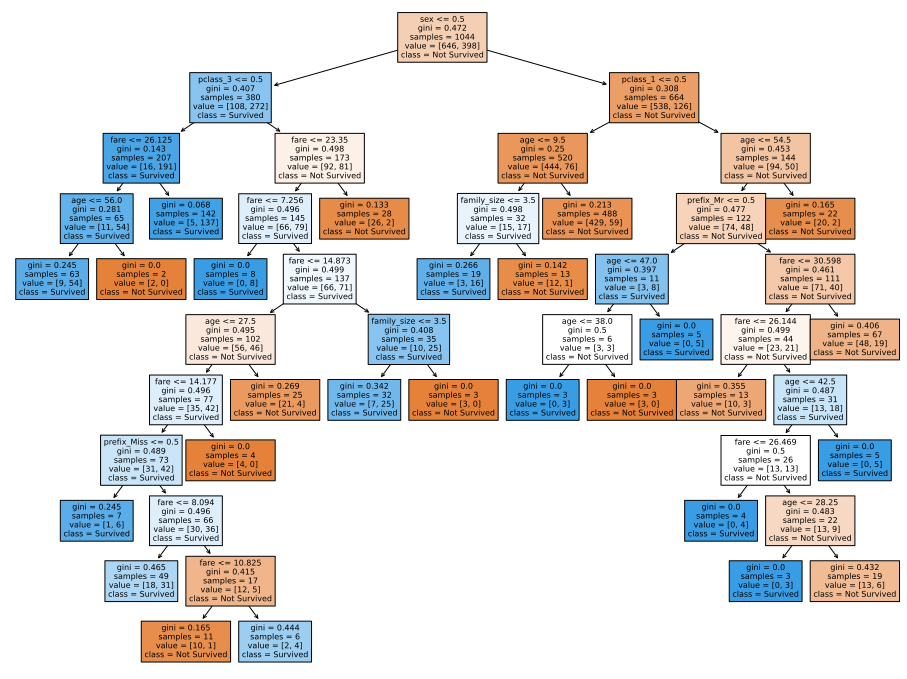

In [ ]:
# Visualize the decision tree with only post-pruning
X = df_final.drop('survived', axis=1)
fn = X.columns
cn = ['Not Survived', 'Survived']

fig= plt.figure(figsize=(16,12))
_ = tree.plot_tree(clf_dt_post, feature_names = fn, class_names=cn, filled=True)
# tree still overfits

In [ ]:
# let's add post-pruning parameter to the pre-pruning
clf_dt_full = DecisionTreeClassifier (random_state= 0, criterion= 'gini', max_depth=4,
                                      min_samples_leaf= 30, ccp_alpha= 0.00206486)

clf_dt_full.fit (X_train, y_train)

print(clf_dt_full.score (X_test, y_test))

0.8084291187739464


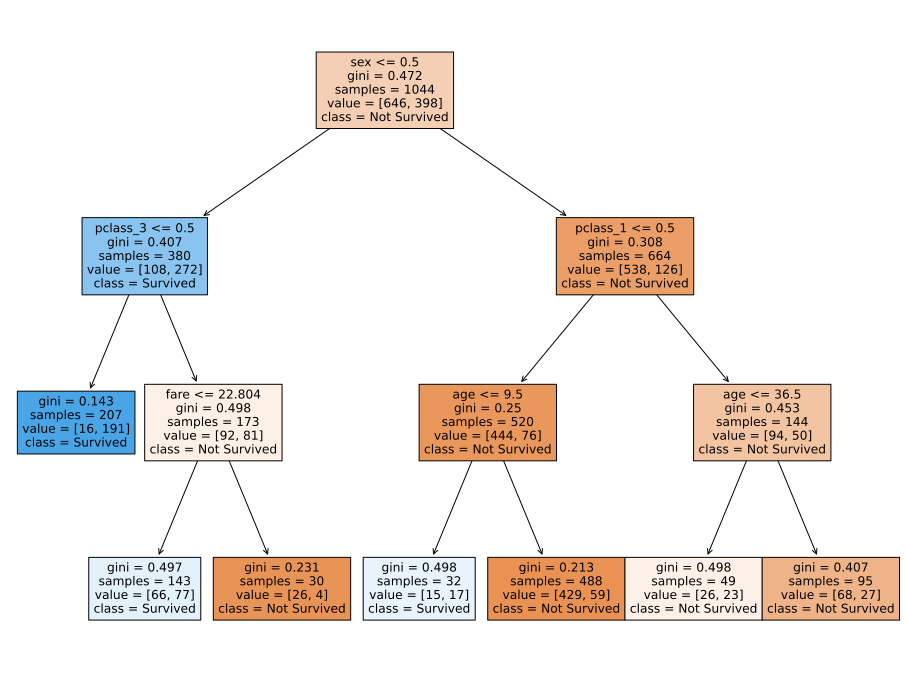

In [ ]:
# Visualize the decision tree with both pre and post pruning parameters
# it is a tree with 7 leaves.
X = df_final.drop('survived', axis=1)
fn=X.columns
cn = ['Not Survived', 'Survived']

fig= plt.figure(figsize=(16,12))
_ = tree.plot_tree(clf_dt_full, feature_names = fn, class_names=cn, filled=True)

## Weighted Decision Tree
Let's assume an unequal misclassification cost (i.e., loss for misclassifying Not Survived as being Survived is twice the Loss of misclassifying Survived as being Not Survived).
We use class_weight parameter to do so

In [ ]:
# to use decision weight, the target variable must be 'int' type instead of category
df_final['survived'] = df_final['survived'].astype('int')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop('survived', axis=1),
                                                    df_final['survived'], stratify = df_final['survived'],
                                                    test_size=0.2, random_state=101)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print('The length of training set:', len(X_train))
print('The length of testing set:', len(X_test))

The length of training set: 1044
The length of testing set: 261


In [ ]:
clf_dt_weight = DecisionTreeClassifier(random_state= 0, criterion= 'gini', max_depth=4,
                                       class_weight= {0:2},
                                      min_samples_leaf= 30, ccp_alpha= 0.00206486)

clf_dt_weight.fit (X_train, y_train)

print(clf_dt_weight.score (X_test, y_test))

0.7662835249042146


In [ ]:
y_predict_weight = clf_dt_weight.predict(X_test)
weighted_matrix_table =  pd.DataFrame(
              confusion_matrix(y_test, y_predict_weight),
              columns= ['Predicted Not Survived', 'Predicted Survived'],
              index= ['True Not Survived', 'True Survived']
)
weighted_matrix_table

,Predicted Not Survived,Predicted Survived
True Not Survived,160,1
True Survived,60,40


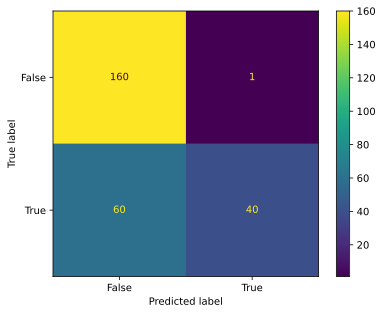

In [ ]:
# Visualize the confusion matrix display
cm_weight = metrics.confusion_matrix(y_test,y_predict_weight)
cm_weight_display = metrics.ConfusionMatrixDisplay(confusion_matrix= cm_weight, display_labels =[False, True])
cm_weight_display.plot()
plt.show()

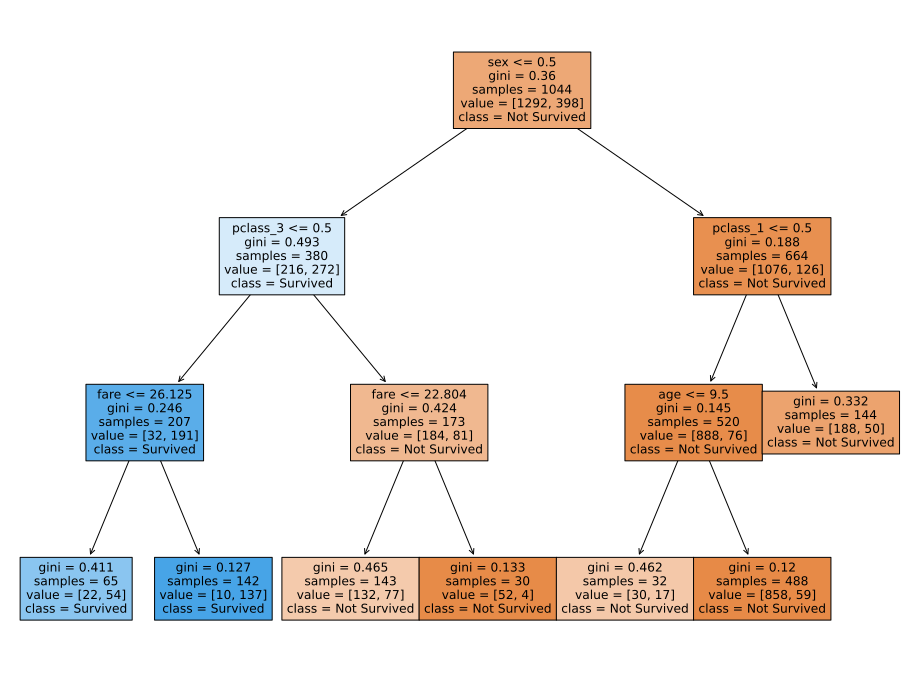

In [ ]:
# Visualize the decision tree
from sklearn import tree
X = df_final.drop('survived', axis=1)
fn=X.columns
cn = ['Not Survived', 'Survived']

fig= plt.figure(figsize=(16,12))
_ = tree.plot_tree(clf_dt_weight, feature_names = fn, class_names=cn, filled=True)

# Evaluation
## Profit Loss Matrix for weighted model
Based on unequal misclassification cost (i.e., loss for misclassifying Not Survived as being Survived is twice the loss of misclassifying Survived as being Not Survived)

In [ ]:
# there is 1 case misclassified as Survived
# there are 60 cases misclassified as Not Survived
weighted_matrix_table

,Predicted Not Survived,Predicted Survived
True Not Survived,160,1
True Survived,60,40


In [ ]:
# Index of the number of cases misclassified as Survived
print(weighted_matrix_table.iloc[0][1])
# Index of the number of cases misclassified as Not Survived
print(weighted_matrix_table.iloc[1][0])

1
60


In [ ]:
# Avg_loss = (total loss)/ total number of cases
avg_loss = (weighted_matrix_table.iloc[0][1] * 2 + weighted_matrix_table.iloc[1][0])/len(y_test)
avg_loss

0.23754789272030652

In [ ]:
# The worst loss is that we misclassify every case
# Total true Not Survived is 161 and the cost of misclassify them is 2*161
print(weighted_matrix_table.sum(axis = 1)[0])
# Total true Survived is 100 and the cost of misclassify them is 1*100
print(weighted_matrix_table.sum(axis =1)[1])
# Averge worst loss = total worst loss / total number of cases
avg_worst_loss = (weighted_matrix_table.sum(axis = 1)[0]*2 + weighted_matrix_table.sum(axis =1)[1]*1)/len(y_test)
avg_worst_loss

161
100


1.6168582375478928

In [ ]:
score_loss = (avg_worst_loss - avg_loss)/avg_worst_loss
score_loss

0.8530805687203792